In [1]:
import sys
sys.path.append('..')

In [2]:
from nbhd import data

In [3]:
db = data.Base()

Initializing database connection...
Database connected!


In [4]:
pixels = db.select('pixels')

In [5]:
from random import randint

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
# i = randint(0, len(pixels))
i = 2063
print(i)
p = pixels.iloc[i]

2063


In [8]:
britain = db.query('select * from isles limit 1', spatial=True)

In [9]:
from shapely.geometry import box

In [10]:
britbox = box(*list(britain.geometry[0].bounds)).buffer(100000)

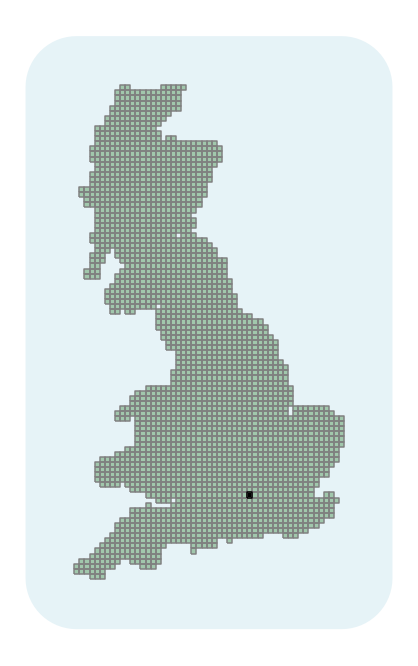

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
gpd.GeoSeries(britbox).plot(color='lightblue', ax=ax, alpha=0.3)
pixels.plot(color='darkgreen', ax=ax, alpha=0.3)
pixels.boundary.plot(color='grey', ax=ax)
gpd.GeoSeries(p.geometry.buffer(1000)).plot(color='k', ax=ax)
gpd.GeoSeries(p.geometry.boundary).plot(color='black', ax=ax)
ax.set_axis_off()

In [12]:
p_roads = db.within('roads', p.geometry)
p_buffered_roads = db.within('roads', p.geometry.buffer(1000))

In [13]:
motorways = p_roads.loc[p_roads.roadFunction == 'Motorway']
a_roads = p_roads.loc[p_roads.roadFunction == 'A Road']
b_roads = p_roads.loc[p_roads.roadFunction == 'B Road']
minor_roads = p_roads.loc[p_roads.roadFunction == 'Minor Road']
local_road = p_roads.loc[p_roads.roadFunction == 'Local Road']
access_road = p_roads.loc[p_roads.roadFunction == 'Local Access Road']
restricted = p_roads.loc[p_roads.roadFunction == 'Restricted Local Access Road']

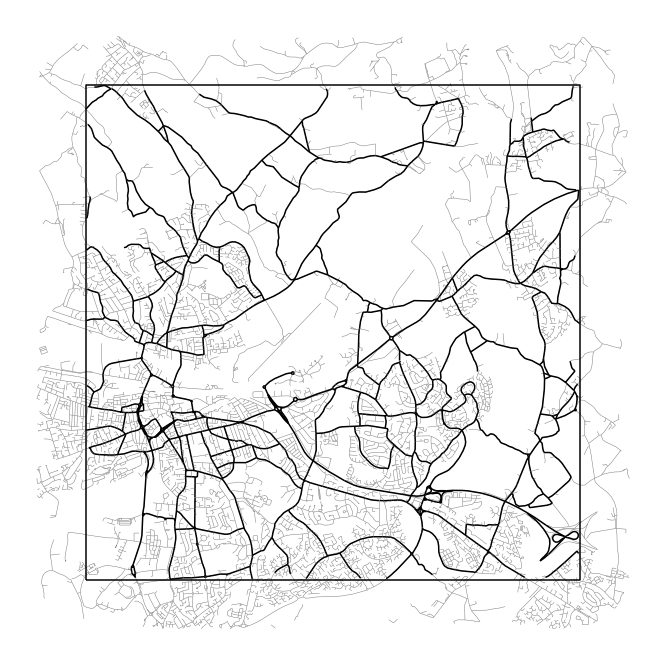

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
p_buffered_roads.plot(color='grey', linewidth=0.5, ax=ax, alpha=1)
motorways.plot(ax=ax, color='k')
a_roads.plot(ax=ax, color='k')
b_roads.plot(ax=ax, color='k')
minor_roads.plot(ax=ax, color='k')
# local_road.plot(ax=ax, color='red')
# access_road.plot(ax=ax, color='red')
# restricted.plot(ax=ax, color='red')
# p_roads.plot('roadFunction', ax=ax, legend=True, cmap='terrain')
gpd.GeoSeries(p.geometry.boundary).plot(color='k', ax=ax)
ax.set_axis_off()

In [15]:
from nbhd.geometry import tessellate

In [16]:
tessellate?

Signature: tessellate(border_gdf_list)
Docstring: Return tessellations from list of borders in geodataframes.
File:      ~/code/nbhd/geometry.py
Type:      function


In [17]:
tiles = tessellate([gpd.GeoDataFrame(geometry=gpd.GeoSeries(p.geometry.boundary)),
                   motorways, a_roads, b_roads, minor_roads])

In [18]:
from mapclassify import greedy

In [19]:
tiles['c'] = greedy(tiles)

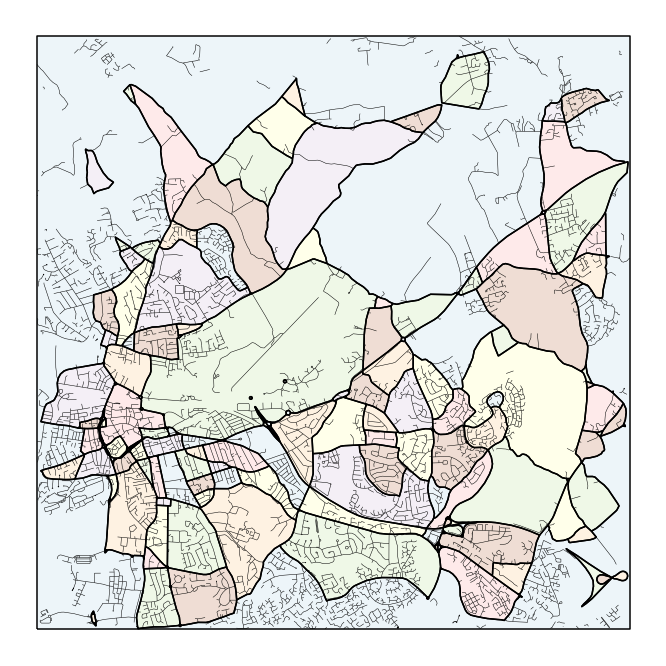

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
tiles.geometry.boundary.plot(ax=ax, color='k')
tiles.plot('c', cmap='Paired', ax=ax, alpha=0.2)
local_road.plot(ax=ax, color='black', linewidth=0.5)
access_road.plot(ax=ax, color='black', linewidth=0.5)
restricted.plot(ax=ax, color='black', linewidth=0.5)
ax.set_axis_off()
